# Model 4:

### Target:

- Add Regularization, `Dropout` (10%)

### Results:

- Parameters: 7,448
- Best Training Accuracy: 98.79
- Best Train Accuracy: 98.98

### Analysis:

- Regularization is working but the model is overfitting.
- But with the current capacity, not possible to push it further. 

# Import Libraries

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import warnings
warnings.filterwarnings("ignore")

## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.

In [2]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [3]:
from utils import load_data

train, test = load_data(train_transforms, test_transforms)

# Dataloader Arguments & Test/Train Dataloaders


In [4]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


# Data Statistics

It is important to know your data very well. Let's check some of the statistics around our data and how it actually looks like

[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)
torch.Size([128, 1, 28, 28])
torch.Size([128])


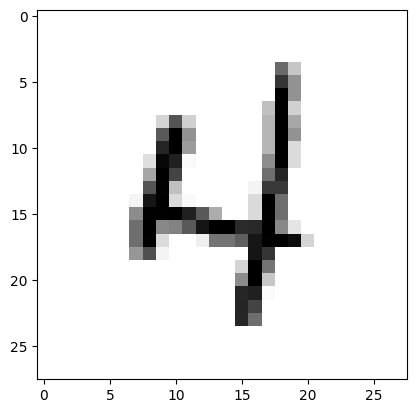

In [5]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

## MORE

It is important that we view as many images as possible. This is required to get some idea on image augmentation later on

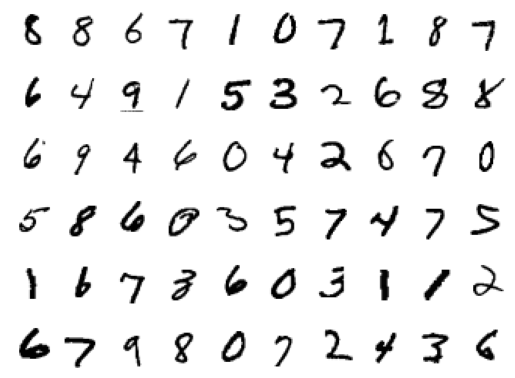

In [6]:
from utils import plot_images
plot_images(images)

# The model
Let's import our model from `model.py` file`

In [7]:
from model import Model4 as Net

# Model Params
Can't emphasize on how important viewing Model Summary is.
Unfortunately, there is no in-built model visualizer, so we have to take external help

In [8]:
# !pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
       BatchNorm2d-2            [-1, 8, 26, 26]              16
              ReLU-3            [-1, 8, 26, 26]               0
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
       BatchNorm2d-6           [-1, 16, 24, 24]              32
              ReLU-7           [-1, 16, 24, 24]               0
           Dropout-8           [-1, 16, 24, 24]               0
            Conv2d-9            [-1, 8, 24, 24]             128
      BatchNorm2d-10            [-1, 8, 24, 24]              16
             ReLU-11            [-1, 8, 24, 24]               0
          Dropout-12            [-1, 8, 24, 24]               0
        MaxPool2d-13            [-1, 8, 12, 12]               0
           Conv2d-14           [-1

# Training and Testing
Looking at logs can be boring, so we'll introduce **tqdm** progressbar to get cooler logs.

Let's import train and test functions from `model.py` file

In [9]:
from model import train, test

# Let's Train and test our model

In [10]:
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

train_losses = []
test_losses = []
train_acc = []
test_acc = []

EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch, train_losses, train_acc)
    test(model, device, test_loader, test_losses, test_acc)

EPOCH: 0


Loss=0.09332853555679321 Batch_id=468 Accuracy=83.75: 100%|██████████████████████████| 469/469 [00:06<00:00, 75.04it/s]



Test set: Average loss: 0.1639, Accuracy: 9561/10000 (95.61%)

EPOCH: 1


Loss=0.162155881524086 Batch_id=468 Accuracy=96.97: 100%|████████████████████████████| 469/469 [00:06<00:00, 75.35it/s]



Test set: Average loss: 0.1291, Accuracy: 9629/10000 (96.29%)

EPOCH: 2


Loss=0.027113797143101692 Batch_id=468 Accuracy=97.71: 100%|█████████████████████████| 469/469 [00:06<00:00, 76.20it/s]



Test set: Average loss: 0.0687, Accuracy: 9782/10000 (97.82%)

EPOCH: 3


Loss=0.04508665204048157 Batch_id=468 Accuracy=98.07: 100%|██████████████████████████| 469/469 [00:06<00:00, 76.20it/s]



Test set: Average loss: 0.0672, Accuracy: 9793/10000 (97.93%)

EPOCH: 4


Loss=0.04101889953017235 Batch_id=468 Accuracy=98.16: 100%|██████████████████████████| 469/469 [00:06<00:00, 75.94it/s]



Test set: Average loss: 0.0602, Accuracy: 9811/10000 (98.11%)

EPOCH: 5


Loss=0.05162576213479042 Batch_id=468 Accuracy=98.25: 100%|██████████████████████████| 469/469 [00:06<00:00, 74.44it/s]



Test set: Average loss: 0.0452, Accuracy: 9848/10000 (98.48%)

EPOCH: 6


Loss=0.04693301394581795 Batch_id=468 Accuracy=98.51: 100%|██████████████████████████| 469/469 [00:06<00:00, 74.35it/s]



Test set: Average loss: 0.0529, Accuracy: 9827/10000 (98.27%)

EPOCH: 7


Loss=0.05851496756076813 Batch_id=468 Accuracy=98.49: 100%|██████████████████████████| 469/469 [00:06<00:00, 75.16it/s]



Test set: Average loss: 0.0397, Accuracy: 9863/10000 (98.63%)

EPOCH: 8


Loss=0.013997719623148441 Batch_id=468 Accuracy=98.57: 100%|█████████████████████████| 469/469 [00:06<00:00, 75.43it/s]



Test set: Average loss: 0.0447, Accuracy: 9844/10000 (98.44%)

EPOCH: 9


Loss=0.11723227053880692 Batch_id=468 Accuracy=98.62: 100%|██████████████████████████| 469/469 [00:06<00:00, 74.97it/s]



Test set: Average loss: 0.0320, Accuracy: 9898/10000 (98.98%)

EPOCH: 10


Loss=0.004643451888114214 Batch_id=468 Accuracy=98.68: 100%|█████████████████████████| 469/469 [00:06<00:00, 75.41it/s]



Test set: Average loss: 0.0369, Accuracy: 9892/10000 (98.92%)

EPOCH: 11


Loss=0.07037996500730515 Batch_id=468 Accuracy=98.66: 100%|██████████████████████████| 469/469 [00:06<00:00, 75.07it/s]



Test set: Average loss: 0.0440, Accuracy: 9862/10000 (98.62%)

EPOCH: 12


Loss=0.016244759783148766 Batch_id=468 Accuracy=98.72: 100%|█████████████████████████| 469/469 [00:06<00:00, 75.09it/s]



Test set: Average loss: 0.0308, Accuracy: 9898/10000 (98.98%)

EPOCH: 13


Loss=0.02726382575929165 Batch_id=468 Accuracy=98.74: 100%|██████████████████████████| 469/469 [00:06<00:00, 76.38it/s]



Test set: Average loss: 0.0340, Accuracy: 9894/10000 (98.94%)

EPOCH: 14


Loss=0.038637787103652954 Batch_id=468 Accuracy=98.79: 100%|█████████████████████████| 469/469 [00:06<00:00, 75.98it/s]



Test set: Average loss: 0.0344, Accuracy: 9889/10000 (98.89%)



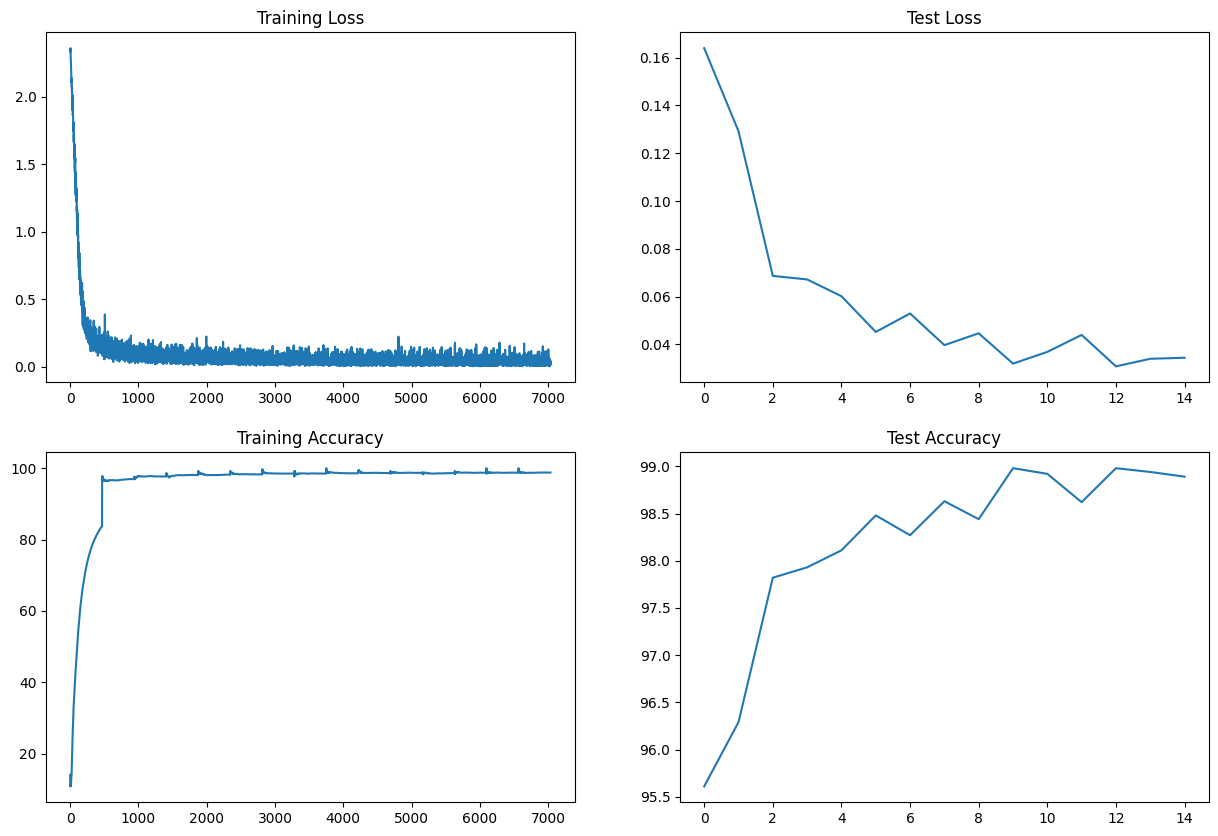

In [11]:
from utils import plot_graphs

plot_graphs(train_acc, train_losses, test_acc, test_losses)